In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
ellipse = pd.read_csv('FeedForward_Data_ellipse.csv', names=['dim1','dim2','label'])

In [3]:
#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

def plot_decision_boundary(clf, X, y, filename):
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    X_out = clf(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

## Part a

In [4]:
X_ellipse = ellipse.values[:, 0:2]       
X_ellipse = torch.tensor(X_ellipse, dtype = torch.float)   
y_ellipse = ellipse.values[:, 2]
y_ellipse = torch.tensor(y_ellipse, dtype = torch.long)

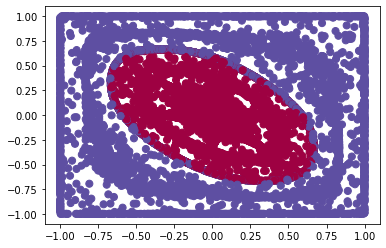

In [5]:
plt.scatter(X_ellipse[:, 0], X_ellipse[:, 1], c=y_ellipse, cmap=plt.cm.Spectral, s = 50)

In [6]:
class Net_a(nn.Module):
    
    def __init__(self):
        super(Net_a, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        torch.nn.init.uniform_(self.fc1.weight, a=-2, b=2)
        
        self.fc2 = nn.Linear(8, 8)
        torch.nn.init.uniform_(self.fc2.weight, a=-2, b=2)
        
        self.fc3 = nn.Linear(8, 8)
        torch.nn.init.uniform_(self.fc3.weight, a=-2, b=2)
        
        self.fc4 = nn.Linear(8, 8)
        torch.nn.init.uniform_(self.fc4.weight, a=-2, b=2)
        
        self.fc5 = nn.Linear(8, 2)
        torch.nn.init.uniform_(self.fc5.weight, a=-2, b=2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x)

In [11]:
previous_loss = 1

net_a = Net_a()

# create a stochastic gradient descent optimizer
learning_rate = .03
optimizer = torch.optim.SGD(net_a.parameters(), lr=learning_rate, momentum=0.9)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

#Stopping conditions
stopping_crit = np.power(1/10,6)
nepochs = 30000

data, target = X_ellipse, y_ellipse
# run the main training loop
for epoch in range(nepochs):

    optimizer.zero_grad()
    # forward propagate
    net_out = net_a(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 100 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net_a(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        if accuracy >= 0.93:
            break
    
    
#%% compute accuracy on training data
net_out = net_a(data)
pred = net_out.data.max(1)[1] 
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

<ipython-input-6-426da4b226e0>:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  4.730766773223877
Training accuracy is  0.4304387019230769
Epoch  100 Loss  0.2673952281475067
Training accuracy is  0.8645582932692307
Epoch  200 Loss  0.2092229276895523
Training accuracy is  0.8920522836538461
Epoch  300 Loss  0.2125016152858734
Training accuracy is  0.8821364182692307
Epoch  400 Loss  0.20481926202774048
Training accuracy is  0.8904747596153846
Epoch  500 Loss  0.20195899903774261
Training accuracy is  0.8918269230769231
Epoch  600 Loss  0.20024149119853973
Training accuracy is  0.8932542067307693
Epoch  700 Loss  0.19898638129234314
Training accuracy is  0.8939302884615384
Epoch  800 Loss  0.19800271093845367
Training accuracy is  0.8953575721153846
Epoch  900 Loss  0.19777438044548035
Training accuracy is  0.8950570913461539
Epoch  1000 Loss  0.19840821623802185
Training accuracy is  0.8935546875
Epoch  1100 Loss  0.19675281643867493
Training accuracy is  0.8952073317307693
Epoch  1200 Loss  0.1965019851922989
Training accuracy is  0.89475661057692

Epoch  10600 Loss  0.18859055638313293
Training accuracy is  0.8996394230769231
Epoch  10700 Loss  0.19369974732398987
Training accuracy is  0.8994140625
Epoch  10800 Loss  0.18817727267742157
Training accuracy is  0.8996394230769231
Epoch  10900 Loss  0.1914343684911728
Training accuracy is  0.8994891826923077
Epoch  11000 Loss  0.18952816724777222
Training accuracy is  0.8996394230769231
Epoch  11100 Loss  0.1880073845386505
Training accuracy is  0.8998647836538461
Epoch  11200 Loss  0.19310975074768066
Training accuracy is  0.8994140625
Epoch  11300 Loss  0.18890883028507233
Training accuracy is  0.8997145432692307
Epoch  11400 Loss  0.18961423635482788
Training accuracy is  0.8994891826923077
Epoch  11500 Loss  0.18932989239692688
Training accuracy is  0.8995643028846154
Epoch  11600 Loss  0.18925078213214874
Training accuracy is  0.8994891826923077
Epoch  11700 Loss  0.19544750452041626
Training accuracy is  0.8994891826923077
Epoch  11800 Loss  0.18743599951267242
Training accura

Epoch  21000 Loss  0.18882645666599274
Training accuracy is  0.9000150240384616
Epoch  21100 Loss  0.1889110952615738
Training accuracy is  0.9000150240384616
Epoch  21200 Loss  0.188237264752388
Training accuracy is  0.8999399038461539
Epoch  21300 Loss  0.1889648139476776
Training accuracy is  0.9000150240384616
Epoch  21400 Loss  0.1885889619588852
Training accuracy is  0.8999399038461539
Epoch  21500 Loss  0.18768319487571716
Training accuracy is  0.8997145432692307
Epoch  21600 Loss  0.18930624425411224
Training accuracy is  0.8998647836538461
Epoch  21700 Loss  0.18935200572013855
Training accuracy is  0.8997145432692307
Epoch  21800 Loss  0.18753734230995178
Training accuracy is  0.8997896634615384
Epoch  21900 Loss  0.18745756149291992
Training accuracy is  0.8997145432692307
Epoch  22000 Loss  0.18803587555885315
Training accuracy is  0.8999399038461539
Epoch  22100 Loss  0.1880369782447815
Training accuracy is  0.8998647836538461
Epoch  22200 Loss  0.1895376741886139
Training

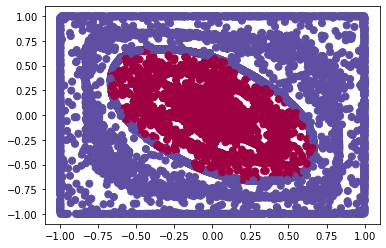

In [8]:
plt.scatter(X_ellipse[:, 0], X_ellipse[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)

In [10]:
print(net_a.fc1.weight)
print(net_a.fc2.weight)
print(net_a.fc3.weight)
print(net_a.fc4.weight)
print(net_a.fc5.weight)

Parameter containing:
tensor([[ 1.3620,  1.1528],
        [ 0.7054,  1.7883],
        [-1.0898,  0.0905],
        [-2.1513,  0.0681],
        [-3.0237,  0.6077],
        [-0.3477, -0.2303],
        [ 0.5557,  1.6848],
        [ 0.2558, -1.0283]], requires_grad=True)
Parameter containing:
tensor([[ 1.9366,  1.8389, -1.1135,  0.2659, -0.9842, -1.6686, -1.0154,  1.6187],
        [-1.5992, -1.7930, -0.6350,  0.1672,  0.1764, -1.5003,  0.0227, -1.4522],
        [ 1.4664, -1.1487, -1.3295,  0.9337, -1.0771,  1.2862,  1.6542,  0.9448],
        [-1.5142,  1.1342,  2.2632,  1.3970, -1.3595, -0.7252, -1.3997, -1.0973],
        [-1.4483, -0.8409, -0.1585, -0.0668, -1.3869, -0.4843,  0.1753, -0.0686],
        [ 1.6706,  2.7727,  1.0274, -2.0756,  1.9246,  0.5485,  0.4686, -0.2503],
        [-0.9804,  3.2767, -0.2593,  0.0990, -0.7995,  0.9192,  0.2127,  1.4943],
        [ 0.5194, -1.6390,  1.2513, -1.7456,  1.5099, -1.4633, -1.1709,  1.4794]],
       requires_grad=True)
Parameter containing:
tenso